## Preprocessing

In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q "datasets==2.2.2" seqeval
!pip install gradio
!sudo apt install tesseract-ocr
!pip install pytesseract

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import re
import cv2 

import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [3]:
IMG_DIR = 'images/'

### Preprocessing of images using OpenCV

We will write basic functions for different preprocessing methods 
- grayscaling
- thresholding
- dilating
- eroding
- opening
- canny edge detection
- noise removal
- deskwing
- template matching. 

Different methods can come in handy with different kinds of images. 

In [4]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

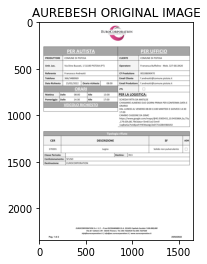

In [5]:
# Plot original image

image = cv2.imread('/content/11.PNG')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('AUREBESH ORIGINAL IMAGE')
plt.show()

In [6]:
# Preprocess image 

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening, 
          'canny': canny}

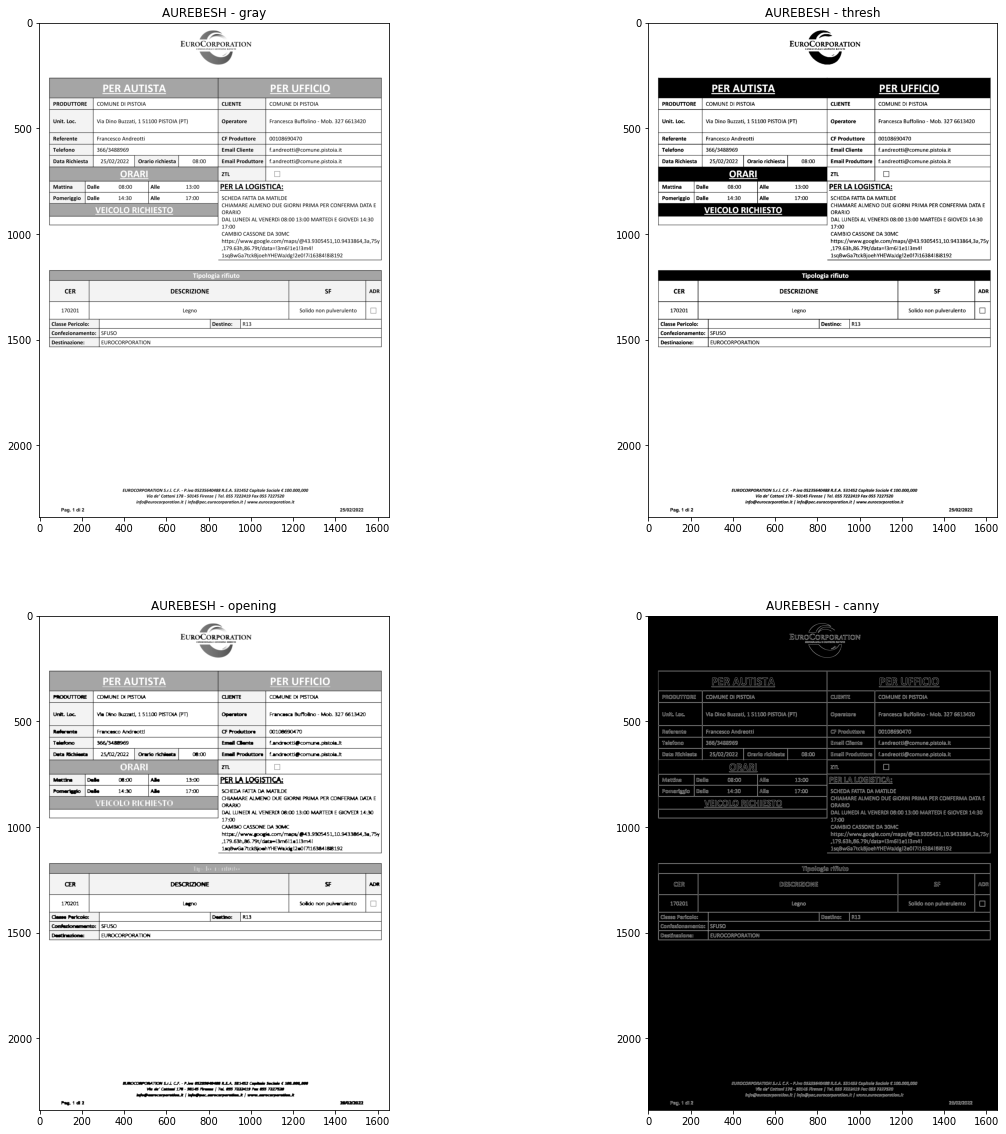

In [7]:
# Plot images after preprocessing

fig = plt.figure(figsize=(20,20))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')    

In [8]:
import cv2 
import pytesseract

img = cv2.imread('/content/12.PNG')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
print(pytesseract.image_to_string(img, config=custom_config))

EUROCORPORATION
PRODUTTORE COMUNE DI PISTOIA CLIENTE COMUNE DI PISTOIA
Via Dino Buzzati, 1 51100 PISTOIA (PT) Francesca Buffolino - Mob. 327 6613420
366/3488969 Email Cliente f.andreotti@comune.pistoia.it
Data Richiesta 25/02/2022 08:00 Email Produttore | f.andreotti@comune.pistoia.it
ORARI jm [oT
Dalle 08:00‘ lle 13:00 PER LA LOGISTICA:
Dalle 14:30 Alle 17:00 SCHEDA FATTA DA MATILDE
CHIAMARE ALMENO DUE GIORNI PRIMA PER CONFERMA DATA E
VEICOLO RICHIESTO ORARIO
Po DAL LUNEDi AL VENERDi 08:00 13:00 MARTEDi E GIOVEDi 14:30
17:00
CAMBIO CASSONE DA 30MC
https://www.google.com/maps/@43.9305451,10.9433864,3a,75y
,179.63h,86.79t/data=!3m6!1e1!3m4!
1sqBwGa7tckBjoehYHEWaJdg!2e0!7116384!8i8192
Tipologia rifiuto
170904 Misti da demolizione non pericolosi non cernitabili Solido non pulverulento fo
EUROCORPORATION
EUROCORPORATION S.r.l. C.F. - P.iva 05235640488 R.E.A. 531452 Capitale Sociale € 100.000,000
Via de’ Cattani 178 - 50145 Firenze | Tel. 055 7222419 Fax 055 7227520
info@eurocorporation.it 

In [9]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
EUROCORPORATION
PRODUTTORE COMUNE DI PISTOIA CLIENTE COMUNE DI PISTOIA
Via Dino Buzzati, 1 51100 PISTOIA (PT) Francesca Buffolino - Mob. 327 6613420
366/3488969 Email Cliente f.andreotti@comune.pistoia.it
Data Richiesta 25/02/2022 08:00 Email Produttore | f.andreotti@comune.pistoia.it
ORARI
Dalle 08:00‘ lle 13:00 PER LA LOGISTICA:
Dalle 14:30 Alle 17:00 SCHEDA FATTA DA MATILDE
CHIAMARE ALMENO DUE GIORNI PRIMA PER CONFERMA DATA E
VEICOLO RICHIESTO ORARIO.
Po DAL LUNEDi AL VENERDi 08:00 13:00 MARTEDi E GIOVEDi 14:30
17:00
CAMBIO CASSONE DA 30MC
https://www.google.com/maps/@43.9305451,10.9433864,3a,75y
,179.63h,86.79t/data=!3m6!1e1!3m4!
1sqBwGa7tckBjoehYHEWaJdg!2e0!7116384!8i8192
Tipologia rifiuto
7020" Solido non pulverulento |
EUROCORPORATION
EUROCORPORATION S.r.l. C.F. - P.iva 05235640488 R.E.A. 531452 Capitale Sociale € 100.000,000
Via de’ Cattani 178 - 50145 Firenze

## Bounding box information using Pytesseract

### Bounding box information using Pytesseract

While running and image through the tesseract OCR engine, pytesseract allows you to get bounding box imformation 
- on a character level
- on a word level
- based on a regex template

We will see how to obtain both

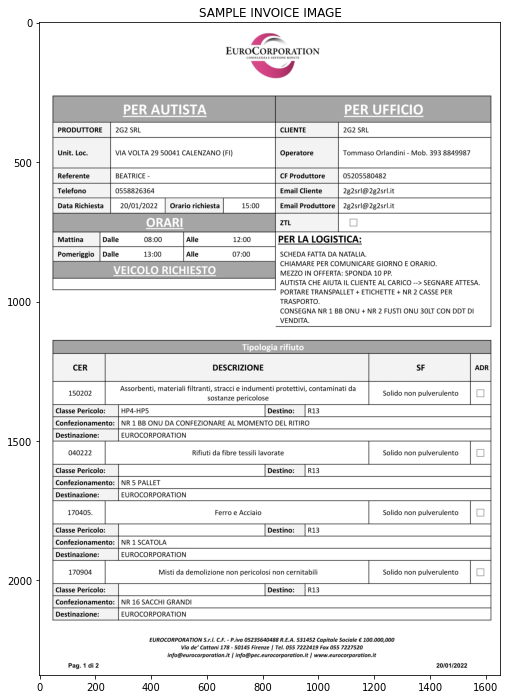

In [10]:
# Plot original image

image = cv2.imread(IMG_DIR + '1-1.PNG')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE IMAGE')
plt.show()

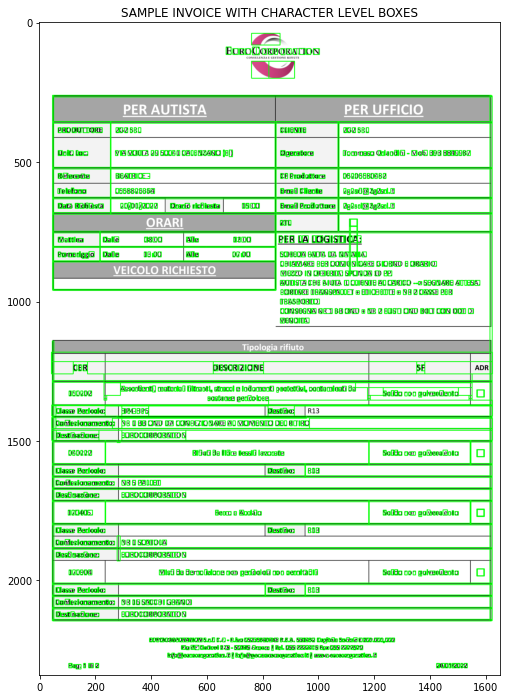

In [11]:
# Plot character boxes on image using pytesseract.image_to_boxes() function

image = cv2.imread(IMG_DIR + '1-1.PNG')
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image) 
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH CHARACTER LEVEL BOXES')
plt.show()

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


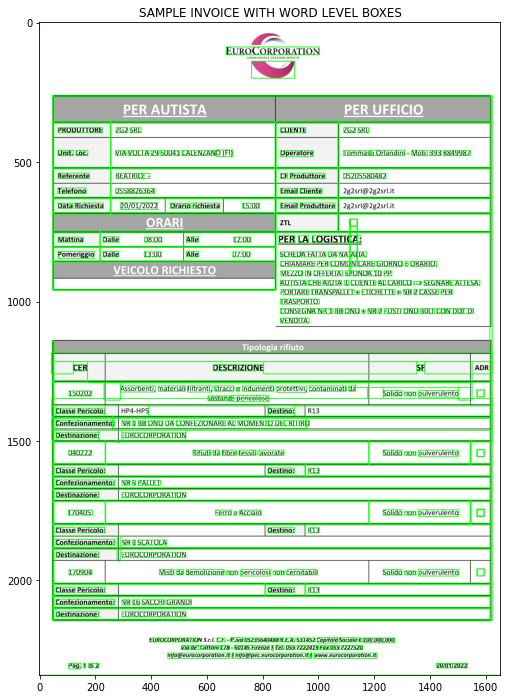

In [12]:
# Plot word boxes on image using pytesseract.image_to_data() function

image = cv2.imread(IMG_DIR + '1-1.PNG')
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print('DATA KEYS: \n', d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    # condition to only pick boxes with a confidence > 60%
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH WORD LEVEL BOXES')
plt.show()

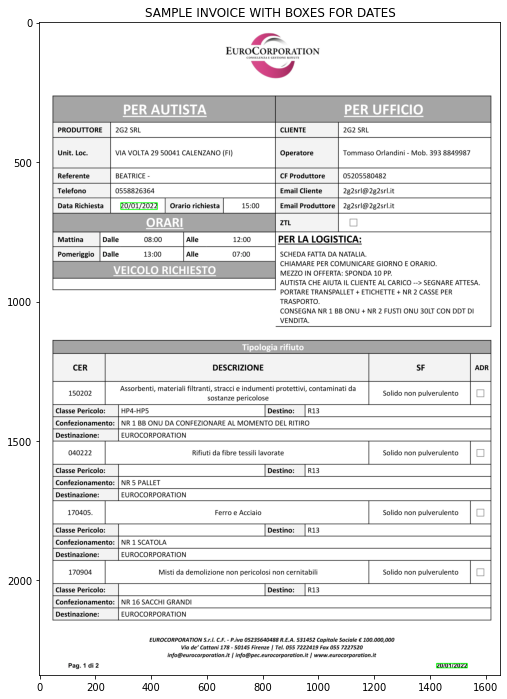

In [13]:
# Plot boxes around text that matches a certain regex template
# In this example we will extract the date from the sample invoice

image = cv2.imread(IMG_DIR + '1-1.PNG')
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        if re.match(date_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH BOXES FOR DATES')
plt.show()

### Page Segmentation Modes

There are several ways a page of text can be analysed. The tesseract api provides several page segmentation modes if you want to run OCR on only a small region or in different orientations, etc.

Here's a list of the supported page segmentation modes by tesseract -

0    Orientation and script detection (OSD) only.  
1    Automatic page segmentation with OSD.  
2    Automatic page segmentation, but no OSD, or OCR.  
3    Fully automatic page segmentation, but no OSD. (Default)  
4    Assume a single column of text of variable sizes.  
5    Assume a single uniform block of vertically aligned text.  
6    Assume a single uniform block of text.  
7    Treat the image as a single text line.  
8    Treat the image as a single word.  
9    Treat the image as a single word in a circle.  
10    Treat the image as a single character.  
11    Sparse text. Find as much text as possible in no particular order.  
12    Sparse text with OSD.  
13    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.  

To change your page segmentation mode, change the ```--psm``` argument in your custom config string to any of the above mentioned mode codes.

### Detect orientation and script

You can detect the orientation of text in your image and also the script in which it is written. 

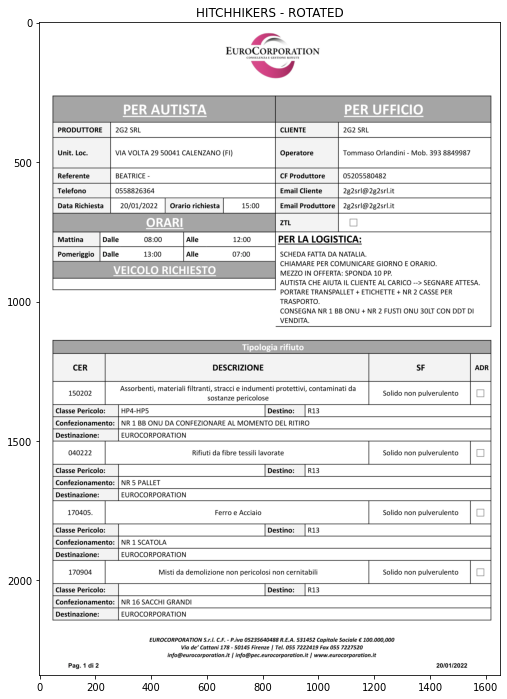

In [14]:
# Plot original image

image = cv2.imread(IMG_DIR + '1-1.PNG')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('HITCHHIKERS - ROTATED')
plt.show()

In [15]:
# Get angle and script

osd = pytesseract.image_to_osd(image)
angle = re.search('(?<=Rotate: )\d+', osd).group(0)
script = re.search('(?<=Script: )\w+', osd).group(0)
print("angle: ", angle)
print("script: ", script)

angle:  0
script:  Latin


### Playing around with the config

By making minor changes in the config file you can 
- specify language
- detect only digits
- whitelist characters
- blacklist characters
- work with multiple languages

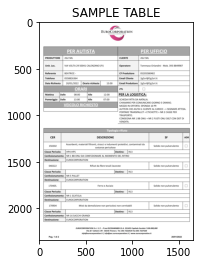

In [16]:
# Plot original image

image = cv2.imread(IMG_DIR + '1-1.PNG')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('SAMPLE TABLE')
plt.show()

In [17]:
# Original tesseract output with english language sepcified

custom_config = r'-l eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

a
EUROCORPORATION
PRODUTTORE | 2G2 SRL CLIENTE 2G2 SRL
ace | VIA VOLTA 29 50041 CALENZANO (FI) Tommaso Orlandini - Mob. 393 8849987
BEATRICE - CF Produttore 05205580482
0558826364 Email Cliente 2g2srl@2g2srl.it
20/01/2022 15:00 Email Produttore | 2g2srl@2g2srl.it
POE
| mattina | Dalle 08:00 Alle 12:00 PER LA LOGISTICA:
Dalle 13:00 Alle 07:00 SCHEDA FATTA DA NATALIA.
CHIAMARE PER COMUNICARE GIORNO E ORARIO.
MEZZO IN OFFERTA: SPONDA 10 PP.
Po AUTISTA CHE AIUTA IL CLIENTE AL CARICO --> SEGNARE ATTESA.
PORTARE TRANSPALLET + ETICHETTE + NR 2 CASSE PER
TRASPORTO.
CONSEGNA NR 1 BB ONU + NR 2 FUSTI ONU 30LT CON DDT DI
VENDITA.
150202 Assorbenti, materiali filtranti, stracci e indumenti protettivi, contaminati da Solido non pulverulento
sostanze pericolose
NR 1 BB ONU DA CONFEZIONARE AL MOMENTO DEL RITIRO
EUROCORPORATION
040222 Rifiuti da fibre tessili lavorate Solido non pulverulento oa
EUROCORPORATION
708s. solide non pulverutento |
EUROCORPORATION
170904 Misti da demolizione non pericolosi n

In [18]:
# Output with outputbase digits

custom_config = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(image, config=custom_config))

a
EUROCORPORATION
PRODUTTORE | 2G2 SRL CLIENTE 2G2 SRL
ace | VIA VOLTA 29 50041 CALENZANO (FI) Tommaso Orlandini - Mob. 393 8849987
BEATRICE - CF Produttore 05205580482
0558826364 Email Cliente 2g2srl@2g2srl.it
20/01/2022 15:00 Email Produttore | 2g2srl@2g2srl.it
POE
| mattina | Dalle 08:00 Alle 12:00 PER LA LOGISTICA:
Dalle 13:00 Alle 07:00 SCHEDA FATTA DA NATALIA.
CHIAMARE PER COMUNICARE GIORNO E ORARIO.
MEZZO IN OFFERTA: SPONDA 10 PP.
Po AUTISTA CHE AIUTA IL CLIENTE AL CARICO --> SEGNARE ATTESA.
PORTARE TRANSPALLET + ETICHETTE + NR 2 CASSE PER
TRASPORTO.
CONSEGNA NR 1 BB ONU + NR 2 FUSTI ONU 30LT CON DDT DI
VENDITA.
150202 Assorbenti, materiali filtranti, stracci e indumenti protettivi, contaminati da Solido non pulverulento
sostanze pericolose
NR 1 BB ONU DA CONFEZIONARE AL MOMENTO DEL RITIRO
EUROCORPORATION
040222 Rifiuti da fibre tessili lavorate Solido non pulverulento oa
EUROCORPORATION
708s. solide non pulverutento |
EUROCORPORATION
170904 Misti da demolizione non pericolosi n

In [19]:
# Output with a whitelist of characters (here, we have used all the lowercase characters from a to z only)

custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

a
EUROCORPORATION
PRODUTTORE | 2G2 SRL CLIENTE 2G2 SRL
ace | VIA VOLTA 29 50041 CALENZANO (FI) Tommaso Orlandini - Mob. 393 8849987
BEATRICE - CF Produttore 05205580482
0558826364 Email Cliente 2g2srl@2g2srl.it
20/01/2022 15:00 Email Produttore | 2g2srl@2g2srl.it
POE
| mattina | Dalle 08:00 Alle 12:00 PER LA LOGISTICA:
Dalle 13:00 Alle 07:00 SCHEDA FATTA DA NATALIA.
CHIAMARE PER COMUNICARE GIORNO E ORARIO.
MEZZO IN OFFERTA: SPONDA 10 PP.
Po AUTISTA CHE AIUTA IL CLIENTE AL CARICO --> SEGNARE ATTESA.
PORTARE TRANSPALLET + ETICHETTE + NR 2 CASSE PER
TRASPORTO.
CONSEGNA NR 1 BB ONU + NR 2 FUSTI ONU 30LT CON DDT DI
VENDITA.
150202 Assorbenti, materiali filtranti, stracci e indumenti protettivi, contaminati da Solido non pulverulento
sostanze pericolose
NR 1 BB ONU DA CONFEZIONARE AL MOMENTO DEL RITIRO
EUROCORPORATION
040222 Rifiuti da fibre tessili lavorate Solido non pulverulento oa
EUROCORPORATION
708s. solide non pulverutento |
EUROCORPORATION
170904 Misti da demolizione non pericolosi n

In [20]:
# Output without the blacklisted characters (here, we have removed all digits)

custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

a
EUROCORPORATION
PRODUTTORE | 2G2 SRL CLIENTE 2G2 SRL
ace | VIA VOLTA 29 50041 CALENZANO (FI) Tommaso Orlandini - Mob. 393 8849987
BEATRICE - CF Produttore 05205580482
0558826364 Email Cliente 2g2srl@2g2srl.it
20/01/2022 15:00 Email Produttore | 2g2srl@2g2srl.it
POE
| mattina | Dalle 08:00 Alle 12:00 PER LA LOGISTICA:
Dalle 13:00 Alle 07:00 SCHEDA FATTA DA NATALIA.
CHIAMARE PER COMUNICARE GIORNO E ORARIO.
MEZZO IN OFFERTA: SPONDA 10 PP.
Po AUTISTA CHE AIUTA IL CLIENTE AL CARICO --> SEGNARE ATTESA.
PORTARE TRANSPALLET + ETICHETTE + NR 2 CASSE PER
TRASPORTO.
CONSEGNA NR 1 BB ONU + NR 2 FUSTI ONU 30LT CON DDT DI
VENDITA.
150202 Assorbenti, materiali filtranti, stracci e indumenti protettivi, contaminati da Solido non pulverulento
sostanze pericolose
NR 1 BB ONU DA CONFEZIONARE AL MOMENTO DEL RITIRO
EUROCORPORATION
040222 Rifiuti da fibre tessili lavorate Solido non pulverulento oa
EUROCORPORATION
708s. solide non pulverutento |
EUROCORPORATION
170904 Misti da demolizione non pericolosi n

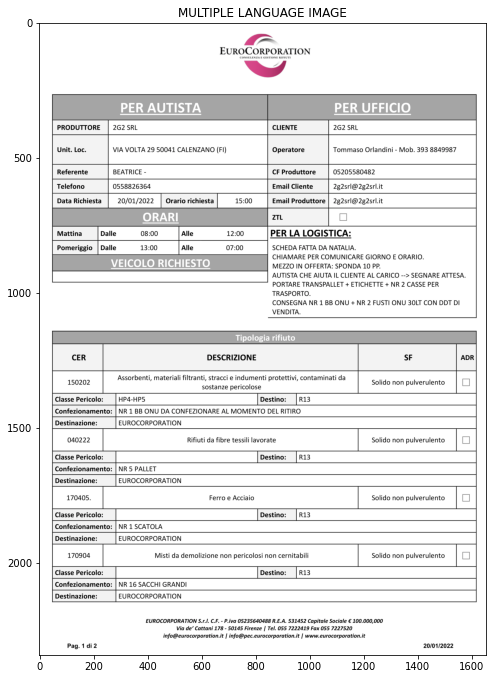

In [21]:
# working with multiple languages

# Plot original image

image = cv2.imread(IMG_DIR + '1-1.PNG')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(8,16))
plt.imshow(rgb_img, cmap = 'gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

In [22]:
# Output with only english language specified

custom_config = r'-l eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

a
EUROCORPORATION
PRODUTTORE | 2G2 SRL CLIENTE 2G2 SRL
ace | VIA VOLTA 29 50041 CALENZANO (FI) Tommaso Orlandini - Mob. 393 8849987
BEATRICE - CF Produttore 05205580482
0558826364 Email Cliente 2g2srl@2g2srl.it
20/01/2022 15:00 Email Produttore | 2g2srl@2g2srl.it
POE
| mattina | Dalle 08:00 Alle 12:00 PER LA LOGISTICA:
Dalle 13:00 Alle 07:00 SCHEDA FATTA DA NATALIA.
CHIAMARE PER COMUNICARE GIORNO E ORARIO.
MEZZO IN OFFERTA: SPONDA 10 PP.
Po AUTISTA CHE AIUTA IL CLIENTE AL CARICO --> SEGNARE ATTESA.
PORTARE TRANSPALLET + ETICHETTE + NR 2 CASSE PER
TRASPORTO.
CONSEGNA NR 1 BB ONU + NR 2 FUSTI ONU 30LT CON DDT DI
VENDITA.
150202 Assorbenti, materiali filtranti, stracci e indumenti protettivi, contaminati da Solido non pulverulento
sostanze pericolose
NR 1 BB ONU DA CONFEZIONARE AL MOMENTO DEL RITIRO
EUROCORPORATION
040222 Rifiuti da fibre tessili lavorate Solido non pulverulento oa
EUROCORPORATION
708s. solide non pulverutento |
EUROCORPORATION
170904 Misti da demolizione non pericolosi n

In [23]:
# Output with all languages specified

custom_config = r'-l grc+tha+eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

a
EUROCORPORATION
PRODUTTORE | 2G2 SRL CLIENTE 2G2 SRL
ace | VIA VOLTA 29 50041 CALENZANO (FI) Tommaso Orlandini - Mob. 393 8849987
BEATRICE - CF Produttore 05205580482
0558826364 Email Cliente 2g2srl@2g2srl.it
20/01/2022 15:00 Email Produttore | 2g2srl@2g2srl.it
POE
| mattina | Dalle 08:00 Alle 12:00 PER LA LOGISTICA:
Dalle 13:00 Alle 07:00 SCHEDA FATTA DA NATALIA.
CHIAMARE PER COMUNICARE GIORNO E ORARIO.
MEZZO IN OFFERTA: SPONDA 10 PP.
Po AUTISTA CHE AIUTA IL CLIENTE AL CARICO --> SEGNARE ATTESA.
PORTARE TRANSPALLET + ETICHETTE + NR 2 CASSE PER
TRASPORTO.
CONSEGNA NR 1 BB ONU + NR 2 FUSTI ONU 30LT CON DDT DI
VENDITA.
150202 Assorbenti, materiali filtranti, stracci e indumenti protettivi, contaminati da Solido non pulverulento
sostanze pericolose
NR 1 BB ONU DA CONFEZIONARE AL MOMENTO DEL RITIRO
EUROCORPORATION
040222 Rifiuti da fibre tessili lavorate Solido non pulverulento oa
EUROCORPORATION
708s. solide non pulverutento |
EUROCORPORATION
170904 Misti da demolizione non pericolosi n